In [1]:
import numpy as np
import torch
print(torch.__version__)
from matplotlib import pyplot as plt
from torch import nn
from torchvision import datasets, transforms

1.5.0


Transformer

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [3]:
batch_size = 64

In [4]:
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [5]:
testset = datasets.FashionMNIST('/home/shmalex/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

Read more
https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py

In [6]:
# You can access the weight and bias
# tensors from the model object with model.hidden1.weight and model.hidden1.bias .
class FashionNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # 1st hidden layer
        # images has 28x28 pixels = 784
        self.hidden1 = nn.Linear(784, 256)
        self.hidden2 = nn.Linear(256, 128)
        # output layer
        self.output = nn.Linear(128, 10)
        # softmax activations for last layer
        # The softmax layer converts the activations into probabilities 
        # so that it adds to 1 along dimension 1.
#         self.softmax = nn.Softmax(dim=1)
        self.log_softmax = nn.LogSoftmax(dim=1)
        # activation function in the inner layer
        # We use ReLU activation in the layers before the output layer to learn nonlinearity in the data.
        self.activation = nn.ReLU()
    def forward(self, x):
        """
        A network defined with nn.Module needs to have a forward() method defined. 
        x = input tesor
        """
        # Now we will move the input to the first hidden layer, with 256 nodes:
        x = self.hidden1(x)
        # Next, we pass the outputs from the first hidden layer through 
        # the activation function, which in our case is ReLU:
        x = self.activation(x)
        # We will repeat the same for the second layer, which has 128 nodes, 
        # and pass it through ReLU:
        x = self.hidden2(x)
        x = self.activation(x)
        # Now we pass the last output layer, with 10 output classes
        x = self.output(x)
        output = self.log_softmax(x)

        return output

In [7]:
model = FashionNetwork()

In [8]:
model

FashionNetwork(
  (hidden1): Linear(in_features=784, out_features=256, bias=True)
  (hidden2): Linear(in_features=256, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
  (log_softmax): LogSoftmax()
  (activation): ReLU()
)

In [9]:
model.hidden1.weight.shape, model.hidden2.weight.shape

(torch.Size([256, 784]), torch.Size([128, 256]))

we will use negative log likelihood loss for this

$\text{LogSoftmax}(x_{i}) = \log\left(\frac{\exp(x_i) }{ \sum_j \exp(x_j)} \right)$

$\text{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$

In [21]:
data = range(0,10)

data_sm = np.exp(data)/np.sum(np.exp(data))
data_log_sm = np.log(data_sm)

In [22]:
data_sm, data_log_sm

(array([7.80134161e-05, 2.12062451e-04, 5.76445508e-04, 1.56694135e-03,
        4.25938820e-03, 1.15782175e-02, 3.14728583e-02, 8.55520989e-02,
        2.32554716e-01, 6.32149258e-01]),
 array([-9.45862974, -8.45862974, -7.45862974, -6.45862974, -5.45862974,
        -4.45862974, -3.45862974, -2.45862974, -1.45862974, -0.45862974]))

(range(0, 10), [<matplotlib.lines.Line2D at 0x7f6efe249b10>], 1.0)

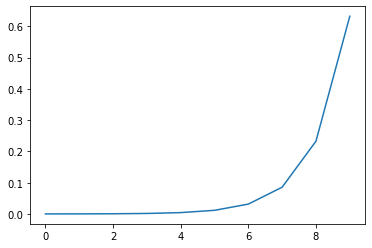

In [23]:
data, plt.plot(data_sm), np.sum(data_sm)

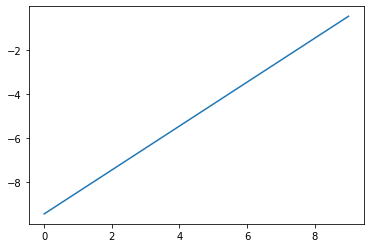

In [24]:
plt.plot(data_log_sm)

In [10]:
criterion = nn.NLLLoss()

Adding optimizer. we have loss funtions, that gives the error of prediction. that error will be used by optimizer so it will backpropogate the update of the weights on NN. Optimizer calculates derivative of error with respect to weights to resude the error. derivative shows the slope of the error funtions growth, so we take negativte direction. the step by which the weights are changed is called learning rate. it help to gradually change the weights and not skip the optimal solution.

In [11]:
from torch import optim

In [12]:
# Adam: A Method for Stochastic Optimization
optimizer = optim.Adam(model.parameters())

In [13]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

In [14]:
epoch = 20

In [15]:
import tqdm

In [16]:
for _ in tqdm.notebook.tqdm(range(epoch)):
    running_loss = 0
    for image, label in trainloader:
        # why we need to call zero_grad?
        optimizer.zero_grad()
        # flattens images into 784xbatch size
        image = image.view(image.shape[0],-1)
        # run the model
        pred = model(image)
        # calculates the loss function
        loss = criterion(pred, label)
        # propogates the error - calculates the gradients
        loss.backward()
        # updates the weights
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f'Trainin loss: {running_loss/len(trainloader):.4f}')
        

Trainin loss: 0.4917
Trainin loss: 0.3689
Trainin loss: 0.3291
Trainin loss: 0.3052
Trainin loss: 0.2886
Trainin loss: 0.2704
Trainin loss: 0.2582
Trainin loss: 0.2434
Trainin loss: 0.2344
Trainin loss: 0.2213
Trainin loss: 0.2126
Trainin loss: 0.2023
Trainin loss: 0.1931
Trainin loss: 0.1858
Trainin loss: 0.1797
Trainin loss: 0.1699
Trainin loss: 0.1631
Trainin loss: 0.1560
Trainin loss: 0.1512
Trainin loss: 0.1424



In [31]:
loss.item()

0.12523552775382996

In [28]:
len(optimizer.state.items())

6

In [17]:
label.shape

torch.Size([32])

In [18]:
label

tensor([6, 0, 8, 9, 1, 6, 4, 4, 0, 5, 0, 1, 2, 3, 5, 3, 2, 8, 7, 3, 7, 9, 0, 8,
        3, 3, 9, 0, 0, 7, 6, 9])

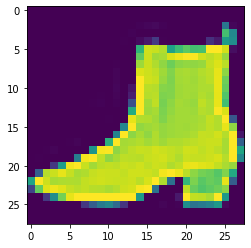

In [19]:
pyplot.imshow(image[3].reshape(28,28))

In [23]:
model.parameters

<bound method Module.parameters of FashionNetwork(
  (hidden1): Linear(in_features=784, out_features=256, bias=True)
  (hidden2): Linear(in_features=256, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
  (log_softmax): LogSoftmax()
  (activation): ReLU()
)>

Implementint Dropouts

In [32]:
# You can access the weight and bias
# tensors from the model object with model.hidden1.weight and model.hidden1.bias .
class FashionNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # 1st hidden layer
        # images has 28x28 pixels = 784
        self.hidden1 = nn.Linear(784, 256)
        self.hidden2 = nn.Linear(256, 128)
        # output layer
        self.output = nn.Linear(128, 10)
        # softmax activations for last layer
        # The softmax layer converts the activations into probabilities 
        # so that it adds to 1 along dimension 1.
        # self.softmax = nn.Softmax(dim=1)
        self.log_softmax = nn.LogSoftmax(dim=1)
        # activation function in the inner layer
        # We use ReLU activation in the layers before the output layer to learn nonlinearity in the data.
        self.activation = nn.ReLU()

        ############### adding dropouts
        self.drop = nn.Dropout(p=0.25)
    def forward(self, x):
        """
        A network defined with nn.Module needs to have a forward() method defined. 
        x = input tesor
        """
        # Now we will move the input to the first hidden layer, with 256 nodes:
        x = self.hidden1(x)
        # Next, we pass the outputs from the first hidden layer through 
        # the activation function, which in our case is ReLU:
        x = self.activation(x)
        x = self.drop(x) # <<<<<<<<<<<<<<<<<<<<
        # We will repeat the same for the second layer, which has 128 nodes, 
        # and pass it through ReLU:
        x = self.hidden2(x)
        x = self.activation(x)
        x = self.drop(x) # <<<<<<<<<<<<<<<<<<<<
        # Now we pass the last output layer, with 10 output classes
        x = self.output(x)
        output = self.log_softmax(x)

        return output

In [36]:
model = FashionNetwork()
epoch = 20
optimizer = optim.Adam(model.parameters())
for _ in tqdm.notebook.tqdm(range(epoch)):
    running_loss = 0
    for image, label in trainloader:
        optimizer.zero_grad()
        image = image.view(image.shape[0], -1)
        pred = model(image)
        loss = criterion(pred, label)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Trainin loss: {running_loss/len(trainloader):.4f}')


Trainin loss: 0.5554
Trainin loss: 0.4234
Trainin loss: 0.3877
Trainin loss: 0.3644
Trainin loss: 0.3495
Trainin loss: 0.3367
Trainin loss: 0.3298
Trainin loss: 0.3166
Trainin loss: 0.3092
Trainin loss: 0.3008
Trainin loss: 0.2942
Trainin loss: 0.2892
Trainin loss: 0.2851
Trainin loss: 0.2768
Trainin loss: 0.2750
Trainin loss: 0.2667
Trainin loss: 0.2658
Trainin loss: 0.2627
Trainin loss: 0.2603
Trainin loss: 0.2549



In [51]:
def train_model(model):
    epoch = 20
    optimizer = optim.Adam(model.parameters())
    for _ in tqdm.notebook.tqdm(range(epoch)):
        running_loss = 0
        for image, label in trainloader:
            optimizer.zero_grad()
            image = image.view(image.shape[0], -1)
            pred = model(image)
            loss = criterion(pred, label)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Trainin loss: {running_loss/len(trainloader):.4f}')


In [52]:
import torch.nn.functional as F

In [53]:
class FashionNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 16*16)
        self.hidden2 = nn.Linear(16*16, 12*12)
        self.hidden3 = nn.Linear(12*12, 8*8)
        self.output = nn.Linear(8*8, 10)
    def forward(self, x):
        x = F.dropout(F.relu(self.hidden1(x)), p=.25)
        x = F.dropout(F.relu(self.hidden2(x)), p=.25)
        x = F.dropout(F.relu(self.hidden3(x)), p=.25)
        x = F.log_softmax(self.output(x), dim=1)
        return x

In [54]:
model = FashionNetwork()
train_model(model)

Trainin loss: 0.6225
Trainin loss: 0.4522
Trainin loss: 0.4159
Trainin loss: 0.3891
Trainin loss: 0.3686
Trainin loss: 0.3583
Trainin loss: 0.3462
Trainin loss: 0.3387
Trainin loss: 0.3308
Trainin loss: 0.3232
Trainin loss: 0.3159
Trainin loss: 0.3104
Trainin loss: 0.3052
Trainin loss: 0.3008
Trainin loss: 0.2933
Trainin loss: 0.2894
Trainin loss: 0.2861
Trainin loss: 0.2778
Trainin loss: 0.2812
Trainin loss: 0.2714



In [55]:
torch.save(model, open('./models/fashion','wb'), )

/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type FashionNetwork. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [22]:
model = torch.load(open('./models/fashion', 'rb'))

model

FashionNetwork(
  (hidden1): Linear(in_features=784, out_features=256, bias=True)
  (hidden2): Linear(in_features=256, out_features=128, bias=True)
  (hidden3): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [56]:
model.eval()
for image, label in testloader:
    image = image.view(image.shape[0],-1)
    pred=model(image)
    break
np.argmax(pred.detach().numpy(), axis=1)

array([8, 0, 6, 2, 1, 8, 0, 8, 2, 1, 7, 0, 4, 4, 8, 2, 7, 6, 2, 1, 3, 1,
       1, 4, 2, 3, 3, 8, 6, 3, 8, 7, 0, 7, 4, 2, 7, 3, 1, 7, 4, 6, 8, 4,
       9, 8, 2, 6, 6, 8, 6, 3, 2, 5, 1, 8, 7, 4, 4, 4, 6, 6, 3, 4])

In [57]:
step_pred = model.forward(image)
np.argmax(step_pred.detach().numpy(), axis=1)

array([8, 0, 6, 6, 1, 8, 0, 8, 2, 1, 7, 0, 4, 4, 8, 2, 7, 2, 2, 1, 3, 1,
       1, 4, 2, 3, 0, 8, 6, 3, 8, 7, 0, 7, 4, 2, 7, 3, 1, 7, 6, 6, 8, 4,
       9, 8, 4, 6, 6, 8, 2, 3, 2, 5, 1, 8, 7, 4, 4, 4, 6, 6, 3, 4])

In [58]:
label.detach().numpy()

array([8, 0, 6, 2, 1, 8, 0, 8, 2, 1, 7, 0, 4, 4, 8, 2, 7, 4, 2, 1, 6, 1,
       1, 4, 2, 3, 0, 8, 6, 3, 8, 7, 0, 7, 4, 2, 7, 3, 1, 7, 6, 6, 8, 4,
       9, 8, 6, 3, 6, 8, 2, 3, 2, 5, 1, 8, 5, 4, 4, 4, 6, 6, 3, 4])

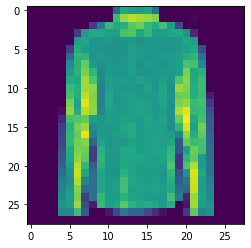

In [59]:
pyplot.imshow(image[-3].reshape(28,28))

In [443]:
text = {
0:'T-shirt/top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'}

In [306]:
class SaveOutput:
    def __init__(self):
        self.output = []
        self.images = []
        self.is_print = False
    def __call__(self, module, module_in, module_out):
        self.output.append((module, module_in, module_out))
#         print(len(self.output))
    def reset(self):
        self.output = []
        self.image = []
    def clear(self):
        self.output = []
    def push(self):
        hidden1 = self.output[0][2].detach().numpy()
        hidden2 = self.output[1][2].detach().numpy()
        hidden3 = self.output[2][2].detach().numpy()
        out1 = self.output[3][2].detach().numpy()
        pred = self.output[4][2].detach().numpy()
        for h1, h2, h3, o1, p in zip(hidden1, hidden2, hidden3, out1, pred):
            self.images.append((h1, h2, h3, o1, p))
        self.clear()

In [286]:
model.eval()

FashionNetwork(
  (hidden1): Linear(in_features=784, out_features=256, bias=True)
  (hidden2): Linear(in_features=256, out_features=144, bias=True)
  (hidden3): Linear(in_features=144, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [292]:
saveOutput = SaveOutput()
hooks = []
for name, module in model.named_modules():
    hook = module.register_forward_hook(saveOutput)
    hooks.append(hook)

In [291]:
for h in hooks:
    h.remove()

In [293]:
step_pred = model(image)
np.argmax(step_pred.detach().numpy(), axis=1)

array([6, 9, 7, 7, 1, 2, 6, 3, 6, 3, 1, 4, 8, 5, 1, 5, 9, 4, 4, 0, 7, 6,
       3, 8, 1, 5, 8, 6, 2, 8, 3, 3, 1, 6, 6, 5, 2, 4, 0, 1, 9, 0, 1, 4,
       8, 9, 0, 3, 1, 1, 8, 5, 9, 9, 3, 4, 7, 3, 4, 9, 1, 0, 5, 7])

In [294]:
saveOutput.push()

In [297]:
len(saveOutput.images)

64

In [185]:
for o in saveOutput.output:
    print(o[2].shape)

In [186]:
def show_activations(i, image, saveOutput, idx, text, pred, label):
    idxl = label.detach().numpy()[idx]
#     print('Labeled as',text[idxl])
#     print('Predicted as', text[np.argmax(pred[idx].detach().numpy())])
    ix=0
    plt.figure(figsize=(10,10))
    plt.subplot(3, 3, ix+1)
    ix+=1
    plt.imshow(image[idx].reshape(28,28))
    plt.subplot(3, 3, ix+1)
    ix+=1
    plt.imshow(saveOutput.output[0][2][idx].detach().numpy().reshape(16,16))
    plt.subplot(3, 3, ix+1)
    ix+=1
    plt.imshow(saveOutput.output[1][2][idx].detach().numpy().reshape(12,12))
    plt.subplot(3, 3, ix+1)
    ix+=1
    plt.imshow(saveOutput.output[2][2][idx].detach().numpy().reshape(8,8))
    plt.subplot(3, 3, ix+1)
    ix+=1
    plt.imshow(saveOutput.output[4][2][idx].detach().numpy().reshape(1,10))
    plt.savefig('./fashion_images/'+f'{i:06}'+'.jpg')
    plt.close()

In [143]:
idxs = np.argsort(label)

for i, idx in tqdm.notebook.tqdm(enumerate(idxs)):
    show_activations(i, image, saveOutput, idx, text, pred, label)

In [156]:
from collections import Counter

In [158]:
Counter(testset.targets.detach().numpy())

Counter({9: 1000,
         2: 1000,
         1: 1000,
         6: 1000,
         4: 1000,
         5: 1000,
         7: 1000,
         3: 1000,
         8: 1000,
         0: 1000})

In [ ]:
np.concatenate()

In [ ]:
np.append()

In [379]:
labels = np.array([])
preds = np.ndarray((0,10))
images = np.ndarray((0,784))
saveOutput.clear()
saveOutput.images = []
model.eval()

for image, label in tqdm.notebook.tqdm(testloader):
    image = image.view(image.shape[0],-1)
    pred=model(image)
    labels = np.concatenate((labels, label.detach().numpy()))
    preds  = np.concatenate((preds,  pred.detach().numpy()))
    images = np.concatenate((images,  image.detach().numpy()))
    saveOutput.push()

In [380]:
len(saveOutput.images), labels.shape, preds.shape, images.shape

(10000, (10000,), (10000, 10), (10000, 784))

In [278]:
hidden1 = saveOutput.output[0][2].detach().numpy()
hidden2 = saveOutput.output[1][2].detach().numpy()
hidden3 = saveOutput.output[2][2].detach().numpy()
out1 = saveOutput.output[3][2].detach().numpy()
pred = saveOutput.output[4][2].detach().numpy()

for h1, h2, h3, o1, p in zip(hidden1, hidden2, hidden3, out1, pred):
    print(h1, h2, h3, o1, p)
    break

In [219]:
np.argsort(labels)

array([8600, 5847, 2389, ..., 2116, 6095,    0])

In [447]:
16*16

256

In [448]:
model

FashionNetwork(
  (hidden1): Linear(in_features=784, out_features=256, bias=True)
  (hidden2): Linear(in_features=256, out_features=144, bias=True)
  (hidden3): Linear(in_features=144, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [459]:
def show_activations(i, image, h1, h2, h3, o1, p, title):
#     print('Labeled as',text[idxl])
#     print('Predicted as', text[np.argmax(pred[idx].detach().numpy())])
    ix=0
    plt.title(title)
    plt.figure(figsize=(10,10))
    plt.subplot(2, 3, ix+1)
    ix+=1
    plt.title(title)
    plt.imshow(image.reshape(28,28))
    plt.subplot(2, 3, ix+1)
    ix+=1
    plt.title('Linear hidden #1 [256]')
    plt.imshow(h1.reshape(16,16))
    plt.subplot(2, 3, ix+1)
    ix+=1
    plt.title('Linear hidden #2 [144]')
    plt.imshow(h2.reshape(12,12))
    plt.subplot(2, 3, ix+1)
    ix+=1
    plt.title('Linear hidden #3 [64]')
    plt.imshow(h3.reshape(8,8))
    plt.subplot(2, 3, ix+1)
    ix+=1
    plt.title('Linear output [10]')
    plt.imshow(o1.reshape(1,10))
    plt.savefig('./fashion_images/'+f'{i:06}'+'.jpg')
    plt.tight_layout()
    plt.close()

In [460]:
images_arr = np.array(saveOutput.images)

/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


T-shirt/top



Trouser



Pullover



Dress



Coat



Sandal



Shirt



Sneaker



Bag



Ankle boot


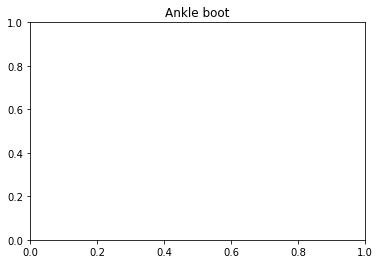

In [463]:
limit = 500
ii = 0
for cls in tqdm.notebook.tqdm(range(10)):
    print(text[cls])
    iter_labels = labels==cls
    pred_idxs = np.argsort(preds[iter_labels][::,cls])[::-1]
    iter_images_data = images_arr[iter_labels][pred_idxs]
    iter_images = images[iter_labels][pred_idxs]
    iter_preds = preds[iter_labels][pred_idxs]
    iter_labels = labels[iter_labels][pred_idxs]
    for i, ((h1, h2, h3, o1, p), image, lbl) in \
        tqdm.notebook.tqdm(list(enumerate(zip(iter_images_data, iter_images, iter_labels)))\
                           [:limit]):
        title = f'{text[lbl]}'
        show_activations(ii, image, h1, h2, h3, o1, p, title)#, idx, pre, lab)
        ii+=1

In [430]:
iter_images.shape

(1000, 784)

In [431]:
q,w,e,r,t = iter_images_data[0]